In [1]:
import numpy as np
import os.path as ptt
import AGNdecomp as agnd
from astropy.io import fits
from AGNdecomp.tools.prof_fit import prof_ana
from AGNdecomp.tools.models import get_model
from AGNdecomp.tools.tools import plot_outputs
from AGNdecomp.tools.tools import sycall
import warnings
warnings.filterwarnings("ignore")
#warnings.filterwarnings('ignore', category=Warning)

In [2]:
plateID='8713'
ifuID='9102'

plateID='11944'
ifuID='12704'

sycall('mkdir -p data_dir')
call='/usr/local/bin/wget https://data.sdss.org/sas/dr17/manga/spectro/redux/v3_1_1/PLATE/stack/manga-PLATE-IFU-LINCUBE.fits.gz'.replace('PLATE',plateID).replace('IFU',ifuID)
if ptt.exists('data_dir/manga-PLATE-IFU-LINCUBE.fits.gz'.replace('PLATE',plateID).replace('IFU',ifuID)) == False:
    sycall(call)
    sycall('mv manga-PLATE-IFU-LINCUBE.fits.gz data_dir/.'.replace('PLATE',plateID).replace('IFU',ifuID))
cube_name='manga-PLATE-IFU-LINCUBE.fits.gz'.replace('PLATE',plateID).replace('IFU',ifuID)
#cube_name='manga-PLATE-IFU.cube.fits.gz'.replace('PLATE',plateID).replace('IFU',ifuID)

Get info for model moffat with 11 parameters
Multiprocessing took 34.8 seconds
wave=5000.0 FLUX=44.95065077711742 FLUXN=372.83948 RADEC=16h13m01.61854514s +37d17m14.91985347s PSF=2.7484371420897054 At=1.3003537110953085 alpha=27.280798970066126 beta=68.63781368960369 xo=36.20657564669147 yo=36.01970697327283 Io=0.1193522177631372 bn=0.6412906978553471 Re=20.11848000980755 ns=0.49276437948559126 ellip=0.5224634348542276 theta=99.07062425238968


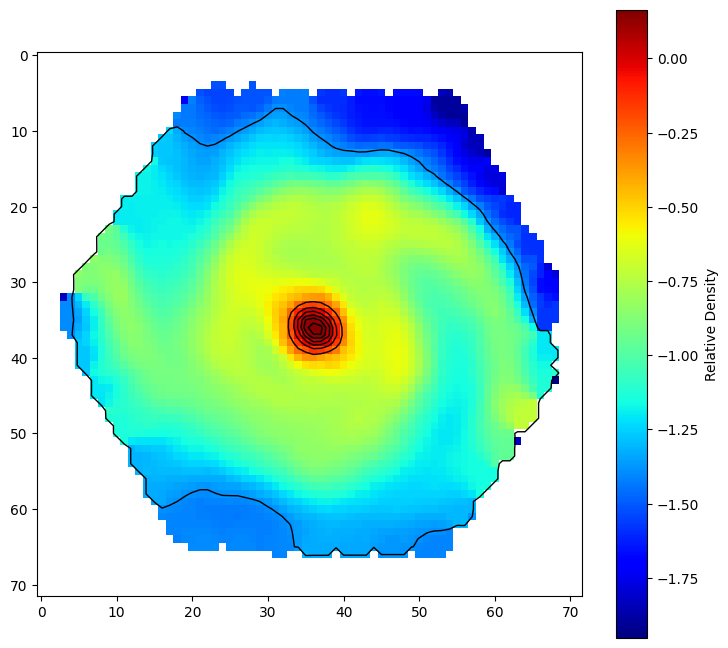

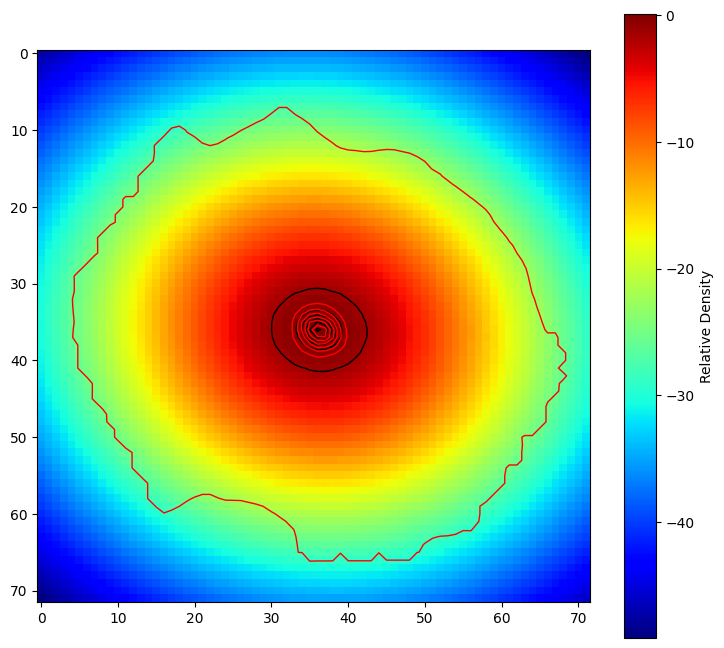

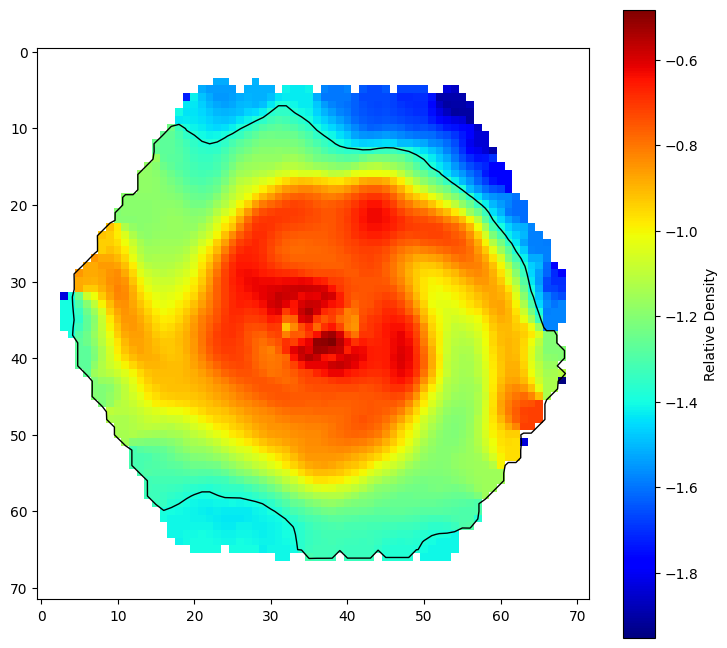

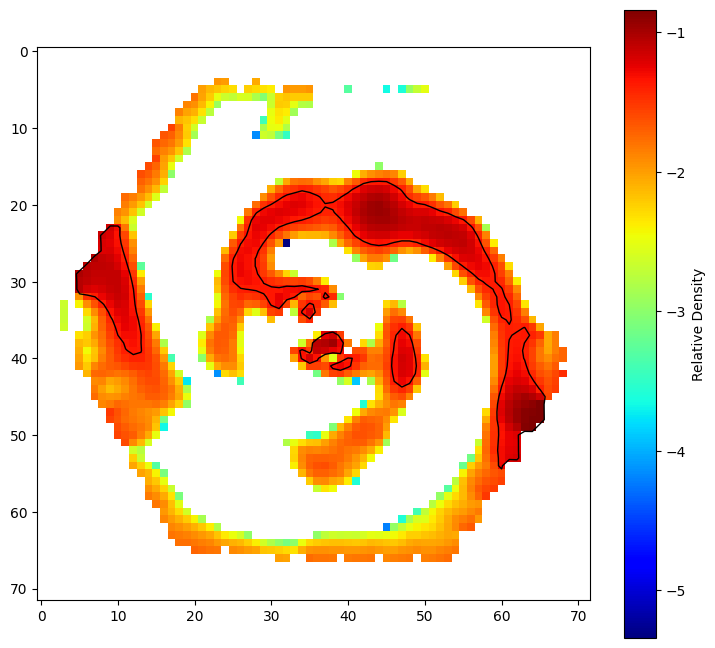

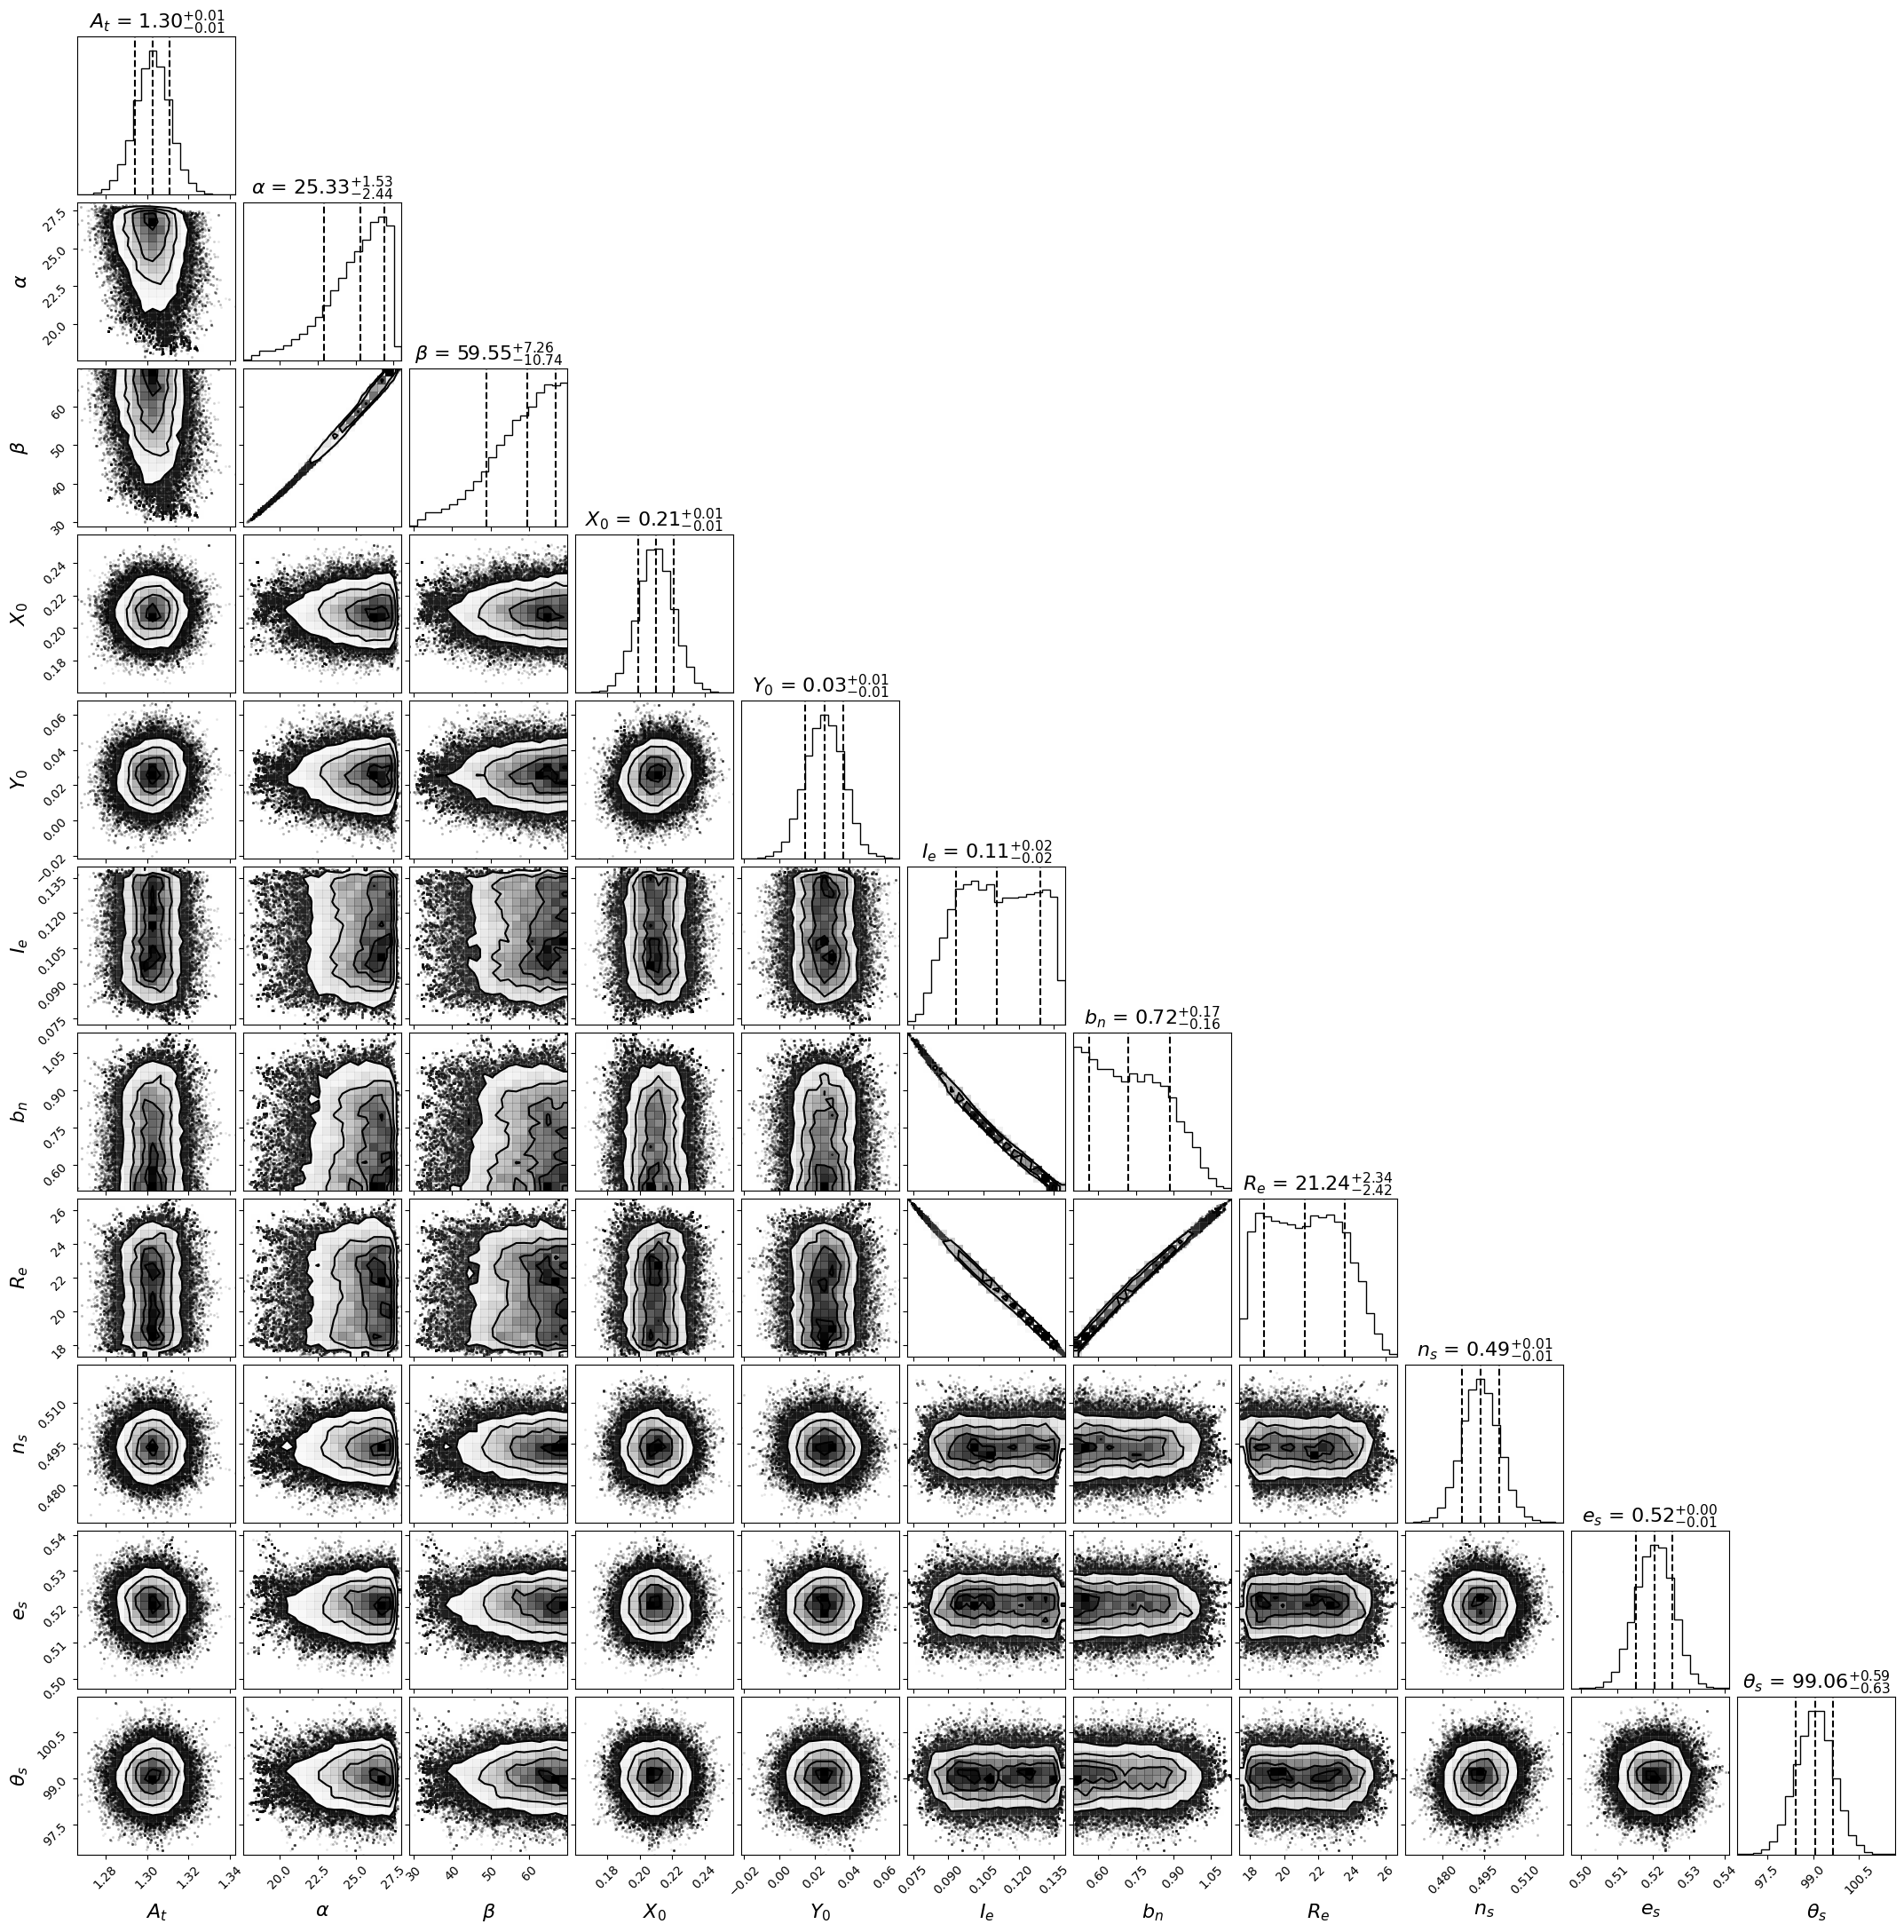

In [3]:
dir_cube='data_dir/'
[cube_data, hdr0]=fits.getdata(dir_cube+cube_name, 'FLUX', header=True)
cube_dataIvr=fits.getdata(dir_cube+cube_name, 'IVAR', header=False)
cube_data[np.where(np.isfinite(cube_data) == False)]=np.nan
cube_dataE=1.0/np.sqrt(cube_dataIvr)
cube_dataE[np.where(np.isfinite(cube_dataE) == False)]=np.nan
#cube_dataE=fits.getdata(dir_cube+cube_name,1,header=False)
      
cube_dataE[np.where(cube_dataE == 1)]=np.nan
cube_data=cube_data
dir_out='out_dir/'
name=hdr0['MANGAID']
verbose=True
test=True
ncpus=5
sampling=20
clean=True

if clean:
    str_p=False
else:
    str_p=True
if test:
    local=True
else:
    local=False  
psamp=sampling

prof_ana(cube_data,cube_dataE,hdr0,dir_o=dir_out,name=name,verbose=verbose,local=local,
         ncpu=ncpus,sp=sampling,str_p=str_p,psamp=psamp)

In [4]:
call='run_agndec run --config_file config_file.yaml'
sycall(call)

Get info for model moffat with 11 parameters
Multiprocessing took 29.6 seconds
wave=5000.0 FLUX=44.94688950838344 FLUXN=372.83948 RADEC=16h13m01.61837377s +37d17m14.92315618s PSF=2.7445360904795435 At=1.3034453494400504 alpha=26.719475325819257 beta=66.04275212435957 xo=36.21066586173227 yo=36.026312381841336 Io=0.10303874754092582 bn=0.7880938151263198 Re=22.263044175955645 ns=0.4930322031386953 ellip=0.5209904750221634 theta=99.20530902834203
